In [62]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
sns.set(font="IPAexGothic")
import sklearn
from sklearn.linear_model import LinearRegression

In [63]:
df1=pd.read_excel('diabetes.xlsx')
df2=pd.read_excel('diabetes.xlsx')

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
年齢           442 non-null int64
性別           442 non-null int64
BMI          442 non-null float64
平均血圧         442 non-null float64
総コレステロール     442 non-null int64
悪玉コレステロール    442 non-null float64
善玉コレステロール    442 non-null float64
tch(血清測定)    442 non-null float64
itg(血清測定)    442 non-null float64
glu(血清測定)    442 non-null int64
1年後の疾患進行度    442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


Text(0, 0.5, '人数')

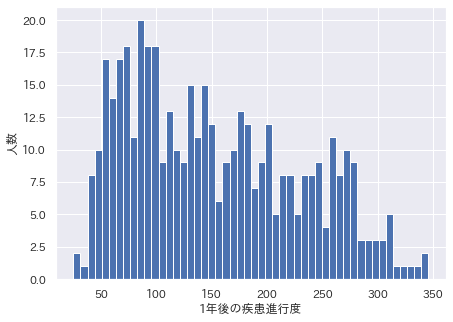

In [65]:
df1['1年後の疾患進行度'].hist(bins=50,figsize=(7,5))
plt.xlabel('1年後の疾患進行度')
plt.ylabel('人数')

Text(0, 0.5, 'BMI')

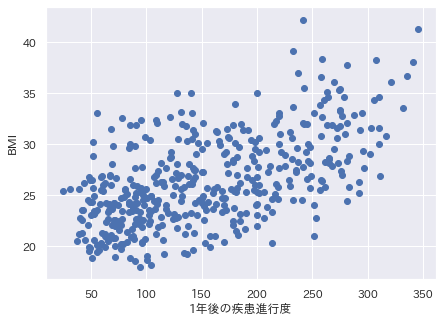

In [66]:
plt.figure(figsize=(7, 5))
plt.scatter(df1['1年後の疾患進行度'],df1['BMI'])
plt.xlabel('1年後の疾患進行度')
plt.ylabel('BMI')

In [67]:
lreg = LinearRegression()

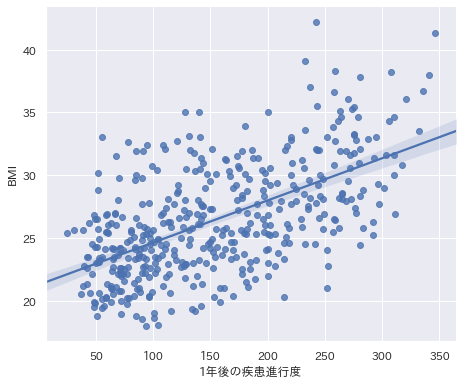

In [68]:
sns.lmplot('1年後の疾患進行度','BMI',data = df2,height=5.5, aspect=1.2)

In [69]:
X=df2.drop('1年後の疾患進行度',1)#訓練データ
Y=df2['1年後の疾患進行度']#正解データ

In [77]:
lreg.fit(X,Y)#予測値を返すモデル

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
test1 = np.array([[24,1,25,84,198,131,40,5,5,89]])
lreg.predict(test1)

array([172.44758843])

In [79]:
test2 = np.array([[50,2,30,100,180,120,50,4,5,77]])
lreg.predict(test2)

array([199.76007721])

In [80]:
test3 = np.array([[35,1,25,80,130,50,60,4,4,60]])
lreg.predict(test3)

array([105.53739152])

In [81]:
df2 = df1.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

In [82]:
df2.head()

,年齢,性別,BMI,平均血圧,総コレステロール,悪玉コレステロール,善玉コレステロール,tch(血清測定),itg(血清測定),glu(血清測定),1年後の疾患進行度
0,0.174698,0.531674,0.236538,0.089479,-0.157550,-0.110753,-0.153097,-0.009908,0.076657,-0.064548,-0.003531
1,-0.008635,-0.468326,-0.197347,-0.107704,-0.030099,-0.060952,0.262488,-0.150952,-0.263123,-0.337275,-0.240291
2,0.391365,0.531674,0.170422,-0.023197,-0.162452,-0.108761,-0.114136,-0.009908,0.011018,-0.094851,-0.034684
3,-0.408635,-0.468326,-0.044454,-0.149958,0.043430,0.079486,-0.127123,0.131136,0.087363,-0.034245,0.167808
4,0.024698,-0.468326,-0.139496,0.089479,0.014018,0.049606,0.028721,-0.009908,-0.123174,-0.170609,-0.053375


In [83]:
df3=pd.DataFrame({'項目':X.columns,'係数':np.abs(lreg.coef_)}).sort_values(by='係数',ascending=False) 
df3

,項目,係数
8,itg(血清測定),68.483125
1,性別,22.859648
7,tch(血清測定),6.533832
2,BMI,5.602962
3,平均血圧,1.116808
4,総コレステロール,1.089996
5,悪玉コレステロール,0.746450
6,善玉コレステロール,0.372005
9,glu(血清測定),0.280117
0,年齢,0.036361
